## Import Packages

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import lightgbm as lgb
import optuna

## Set file paths for training and prediction datasets

In [2]:
train_dataset = "Dataset/Train.csv"
predict_dataset = "Dataset/Test.csv"

## Exploratory Data Analysis

In [3]:
# Read train dataset
train_df = pd.read_csv(train_dataset)
train_df.head()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,...,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
0,-0.351864,2.620660,1.253645,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,0.079303,0.157385,-0.028751,-0.046474,0.222453,1
1,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,3.837751,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.408024,0
2,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.187634,-0.392578,0
3,1.210190,2.682528,1.291868,-0.039223,0.221744,-0.353977,-0.304257,0.859101,-0.318797,2.374782,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.340723,1.334201,2.270899,0.602985,1
4,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.930461,-0.028751,-0.113133,-0.128592,0


In [4]:
# Read predict dataset
predict_df = pd.read_csv(predict_dataset)
predict_df.head()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,...,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters
0,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.120401,-0.323019,1.284346,-0.079531,-0.118688,-0.151911,-0.453742,-0.002540,-0.007263,-0.283052
1,-0.351864,-0.318036,-0.561952,-0.039223,0.007071,-0.353977,-0.304257,-0.240708,-0.318797,0.570271,...,0.291256,-0.323019,-0.205212,-0.079531,-0.118688,1.070723,1.147411,-0.054961,-0.148423,0.049739
2,0.006107,-0.318036,-0.351725,-0.039223,-0.307783,0.027319,-0.304257,-0.240708,3.430188,-0.352968,...,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.121342,0.068771,-0.054961,-0.062158,0.322149
3,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,2.089042,-0.240708,-0.318797,-0.352968,...,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.065290,0.304055,-0.054961,0.008422,-0.204418
4,0.624420,0.609973,-0.561952,-0.039223,0.393482,0.685920,-0.304257,1.134053,-0.318797,-0.352968,...,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.191555,-0.313944


In [5]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Freq_Of_Word_1          947 non-null    float64
 1   Freq_Of_Word_2          947 non-null    float64
 2   Freq_Of_Word_3          947 non-null    float64
 3   Freq_Of_Word_4          947 non-null    float64
 4   Freq_Of_Word_5          947 non-null    float64
 5   Freq_Of_Word_6          947 non-null    float64
 6   Freq_Of_Word_7          947 non-null    float64
 7   Freq_Of_Word_8          947 non-null    float64
 8   Freq_Of_Word_9          947 non-null    float64
 9   Freq_Of_Word_10         947 non-null    float64
 10  Freq_Of_Word_11         947 non-null    float64
 11  Freq_Of_Word_12         947 non-null    float64
 12  Freq_Of_Word_13         947 non-null    float64
 13  Freq_Of_Word_14         947 non-null    float64
 14  Freq_Of_Word_15         947 non-null    fl

In [6]:
predict_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Freq_Of_Word_1          527 non-null    float64
 1   Freq_Of_Word_2          527 non-null    float64
 2   Freq_Of_Word_3          527 non-null    float64
 3   Freq_Of_Word_4          527 non-null    float64
 4   Freq_Of_Word_5          527 non-null    float64
 5   Freq_Of_Word_6          527 non-null    float64
 6   Freq_Of_Word_7          527 non-null    float64
 7   Freq_Of_Word_8          527 non-null    float64
 8   Freq_Of_Word_9          527 non-null    float64
 9   Freq_Of_Word_10         527 non-null    float64
 10  Freq_Of_Word_11         527 non-null    float64
 11  Freq_Of_Word_12         527 non-null    float64
 12  Freq_Of_Word_13         527 non-null    float64
 13  Freq_Of_Word_14         527 non-null    float64
 14  Freq_Of_Word_15         527 non-null    fl

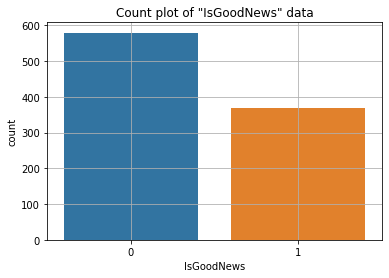

In [7]:
# Plot count of data in "IsGoodNews" field
sns.countplot(x="IsGoodNews", data=train_df).set_title('Count plot of "IsGoodNews" data')
plt.grid()

## Data Preprocessing

#### Read train and predict datasets

In [18]:
train_df = pd.read_csv(train_dataset)
predict_df = pd.read_csv(predict_dataset)
print("train_df: {}".format(train_df.shape))
print("predict_df: {}".format(predict_df.shape))

train_df: (947, 54)
predict_df: (527, 53)


#### Extract "IsGoodNews" field from train_df into NumPy array

In [19]:
train_y = np.array([train_df['IsGoodNews'].values]).T
train_df.drop(['IsGoodNews'], inplace=True, axis=1)
print("train_y: {}".format(train_y.shape))

train_y: (947, 1)


#### Create feature matrices for train and predict datasets

In [20]:
train_x = train_df.values
print("train_x: {}".format(train_x.shape))

train_x: (947, 53)


In [21]:
predict_x = predict_df.values
print("predict_x: {}".format(predict_x.shape))

predict_x: (527, 53)


#### Split training data into train/test datasets

In [22]:
train_x_full = train_x.copy()
train_y_full = train_y.copy()

In [23]:
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.075, random_state=10)

print("------------------------- Training Dataset -------------------------")
print("train_x shape: {}".format(train_x.shape))
print("train_y shape: {}".format(train_y.shape))

print("\n------------------------- Test Dataset -------------------------")
print("test_x shape: {}".format(test_x.shape))
print("test_y shape: {}".format(test_y.shape))

------------------------- Training Dataset -------------------------
train_x shape: (875, 53)
train_y shape: (875, 1)

------------------------- Test Dataset -------------------------
test_x shape: (72, 53)
test_y shape: (72, 1)


## Save the datasets in NPZ file (for reusability)

In [24]:
np.savez_compressed('Dataset/Message_Polarity_dataset_LGBM_v1.npz',
                    Xtrain_full=train_x_full, Ytrain_full=train_y_full,
                    Xtrain=train_x, Ytrain=train_y,
                    Xtest=test_x, Ytest=test_y,
                    Xpredict=predict_x)

## Load datasets from the NPZ file

In [25]:
processed_dataset = np.load('Dataset/Message_Polarity_dataset_LGBM_v1.npz', allow_pickle=True)

Xtrain_full, Ytrain_full = processed_dataset['Xtrain_full'], processed_dataset['Ytrain_full']
Xtrain, Ytrain = processed_dataset['Xtrain'], processed_dataset['Ytrain']
Xtest, Ytest = processed_dataset['Xtest'], processed_dataset['Ytest']
Xpredict = processed_dataset['Xpredict']

print("------------------------- Training Dataset -------------------------")
print("Xtrain_full shape: {}".format(Xtrain_full.shape))
print("Ytrain_full shape: {}".format(Ytrain_full.shape))
print("Xtrain shape: {}".format(Xtrain.shape))
print("Ytrain shape: {}".format(Ytrain.shape))

print("\n------------------------- Test Dataset -------------------------")
print("Xtest shape: {}".format(Xtest.shape))
print("Ytest shape: {}".format(Ytest.shape))

print("\n------------------------- Prediction Dataset -------------------------")
print("Xpredict shape: {}".format(Xpredict.shape))

------------------------- Training Dataset -------------------------
Xtrain_full shape: (947, 53)
Ytrain_full shape: (947, 1)
Xtrain shape: (875, 53)
Ytrain shape: (875, 1)

------------------------- Test Dataset -------------------------
Xtest shape: (72, 53)
Ytest shape: (72, 1)

------------------------- Prediction Dataset -------------------------
Xpredict shape: (527, 53)


## Hyperparameter search using Optuna

In [47]:
def objective(trial):
    train_x, test_x, train_y, test_y = train_test_split(Xtrain, Ytrain, test_size=0.075)
    dtrain = lgb.Dataset(train_x, label=train_y.ravel())
    dtest = lgb.Dataset(test_x, label=test_y.ravel())

    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-2, 1e-1),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-4, 1.0),
        "num_leaves": trial.suggest_int("num_leaves", 31, 150),
        "max_depth": trial.suggest_int("max_depth", 7, 15),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.5, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 5, 20),
        "min_child_samples": trial.suggest_int("min_child_samples", 1, 20),
    }

    gbm = lgb.train(param, dtrain, valid_sets=[dtest], num_boost_round=5000, early_stopping_rounds=200, verbose_eval=False)
    y_pred = gbm.predict(test_x)
    y_pred_binary = np.where(y_pred > 0.5, 1, 0)
    score = accuracy_score(test_y, y_pred_binary)

    return score

In [48]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2020-05-04 03:03:59,522] Finished trial#0 with value: 0.9242424242424242 with parameters: {'learning_rate': 0.02173499404482438, 'lambda_l2': 0.0027056431511635853, 'num_leaves': 109, 'max_depth': 8, 'feature_fraction': 0.5741590651513182, 'bagging_fraction': 0.818612944852377, 'bagging_freq': 18, 'min_child_samples': 13}. Best is trial#0 with value: 0.9242424242424242.
[I 2020-05-04 03:03:59,953] Finished trial#1 with value: 0.8636363636363636 with parameters: {'learning_rate': 0.039862472442157806, 'lambda_l2': 0.0026408304914763343, 'num_leaves': 80, 'max_depth': 11, 'feature_fraction': 0.9989200888701544, 'bagging_fraction': 0.6063651206379446, 'bagging_freq': 16, 'min_child_samples': 13}. Best is trial#0 with value: 0.9242424242424242.
[I 2020-05-04 03:04:00,723] Finished trial#2 with value: 0.9090909090909091 with parameters: {'learning_rate': 0.015651698872934546, 'lambda_l2': 0.09603719602975809, 'num_leaves': 133, 'max_depth': 10, 'feature_fraction': 0.73735961240048, 'bagg

[I 2020-05-04 03:04:54,675] Finished trial#43 with value: 0.9393939393939394 with parameters: {'learning_rate': 0.030132097989619005, 'lambda_l2': 0.04843023451829508, 'num_leaves': 61, 'max_depth': 14, 'feature_fraction': 0.591556786478317, 'bagging_fraction': 0.5928261383192757, 'bagging_freq': 15, 'min_child_samples': 4}. Best is trial#35 with value: 1.0.
[I 2020-05-04 03:04:55,399] Finished trial#44 with value: 0.8939393939393939 with parameters: {'learning_rate': 0.023516560692826125, 'lambda_l2': 0.35974045328071097, 'num_leaves': 48, 'max_depth': 12, 'feature_fraction': 0.8072573927868693, 'bagging_fraction': 0.7913690597515614, 'bagging_freq': 17, 'min_child_samples': 5}. Best is trial#35 with value: 1.0.
[I 2020-05-04 03:04:56,265] Finished trial#45 with value: 0.9242424242424242 with parameters: {'learning_rate': 0.019660851524782974, 'lambda_l2': 0.09224718669017468, 'num_leaves': 84, 'max_depth': 13, 'feature_fraction': 0.5727657675988613, 'bagging_fraction': 0.744725235673

In [49]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("Value: {}".format(trial.value))

print("Params: ")
for key, value in trial.params.items():
    print(" {}: {}".format(key, value))

Number of finished trials: 50
Best trial:
Value: 1.0
Params: 
 learning_rate: 0.016933994236798096
 lambda_l2: 0.11574610605117196
 num_leaves: 39
 max_depth: 12
 feature_fraction: 0.5642919623130809
 bagging_fraction: 0.7498064749936242
 bagging_freq: 15
 min_child_samples: 6


## Build the model

In [50]:
# Define model hyperparameters
params = {}
params["objective"] = 'binary'
params['metric'] = 'binary_logloss'
params['boosting'] = 'gbdt'
params["max_depth"] = 12
params["num_leaves"] = 39
params["learning_rate"] = 0.017
params["bagging_fraction"] = 0.75
params["feature_fraction"] = 0.56
params["bagging_freq"] = 15
params["bagging_seed"] = 10
params["lambda_l2"] = 0.12
params["min_data_in_leaf"] = 6
params["verbosity"] = -1
num_rounds = 5000

In [51]:
# Define 5-fold cross validation test harness
kfold = KFold(n_splits=5, shuffle=True, random_state=10)
y_pred = 0

In [52]:
# Train the model using K-fold
counter = 0

for train, val in kfold.split(Xtrain, Ytrain):
    counter += 1

    train_x, train_y = Xtrain[train], Ytrain[train]
    val_x, val_y = Xtrain[val], Ytrain[val]

    lgtrain = lgb.Dataset(train_x, label=train_y.ravel())
    lgvalidation = lgb.Dataset(val_x, label=val_y.ravel())

    model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgvalidation], early_stopping_rounds=200, verbose_eval=1000)
    pred = model.predict(Xtest, num_iteration=model.best_iteration)

    y_pred += pred

y_pred /= float(counter)

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[330]	valid_0's binary_logloss: 0.174987
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[330]	valid_0's binary_logloss: 0.177215
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[426]	valid_0's binary_logloss: 0.158321
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[718]	valid_0's binary_logloss: 0.129731
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[420]	valid_0's binary_logloss: 0.182712


## Validate the model

In [53]:
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

In [54]:
#Print accuracy
acc_score = accuracy_score(Ytest, y_pred_binary)
print('Overall accuracy of ANN model:', acc_score)

Overall accuracy of ANN model: 0.9027777777777778


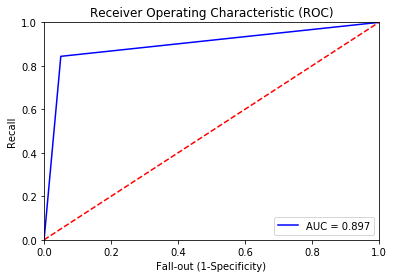

AUC score: 0.896875


In [55]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(Ytest, y_pred_binary)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)

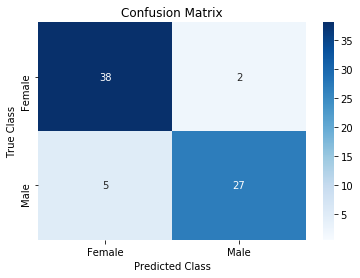

In [56]:
#Print Confusion Matrix
cm = confusion_matrix(Ytest, y_pred_binary)
labels = ['Female', 'Male']
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.5);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## Train the model on entire training data

In [37]:
# Define K-fold cross validation test harness
kfold = KFold(n_splits=5, shuffle=True, random_state=5)
y_pred = 0

In [38]:
# Train the model using K-fold
counter = 0

for train, val in kfold.split(Xtrain_full, Ytrain_full):
    counter += 1

    train_x, train_y = Xtrain_full[train], Ytrain_full[train]
    val_x, val_y = Xtrain_full[val], Ytrain_full[val]

    lgtrain = lgb.Dataset(train_x, label=train_y.ravel())
    lgvalidation = lgb.Dataset(val_x, label=val_y.ravel())

    model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgvalidation], early_stopping_rounds=200, verbose_eval=1000)
    pred1 = model.predict(Xpredict, num_iteration=model.best_iteration)

    y_pred += pred1

y_pred /= float(counter)

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[632]	valid_0's binary_logloss: 0.151167
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[598]	valid_0's binary_logloss: 0.0943408
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[372]	valid_0's binary_logloss: 0.272671
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[715]	valid_0's binary_logloss: 0.13687
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[562]	valid_0's binary_logloss: 0.18293


In [39]:
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

## Create submission file

In [40]:
submit_df = pd.DataFrame(y_pred_binary, columns=['IsGoodNews'])
submit_df.head()

,IsGoodNews
0,0
1,0
2,0
3,1
4,0


In [42]:
submit_df.to_excel("predictions.xlsx", index=False)